The following Notebook uses titanic dataset available at: https://www.udacity.com/api/nodes/5454512672/supplemental_media/titanic-datacsv/download

The dataset represent the characteristics of a sample of the passengers on the Titanic, including whether they dead or alive, gender, age, siblings / spouses, parents and children, fare and embarkation port.

#Importing CSV File

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

titanic = pd.read_csv('titanic_data.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#Question Phase
    1. How many passengers died?
    2. How many passengers younger than 10 survived differentiated by Sex?
    3. How different factors affect on survival of a passenger?
#Wrangling Phase
##Data Investigation
###Check for Missings

In [4]:
#Total Rows in dataset
len(titanic)

891

In [5]:
titanic_na = titanic[titanic.isnull().any(axis = 1)]
len(titanic_na)

708

In [6]:
titanic_na.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S


#Explore Phase
Question 1: How many passengers died?

In [7]:
titanic_passenger_dead = titanic[titanic['Survived']==0]

In [8]:
len(titanic_passenger_dead)

549

Thus, there are 549 out of 891 who are dead.

Question 2: How many passengers younger than 10 survived differentiated by Sex?

In [9]:
passengers_younger_than_10 = titanic[(titanic['Age']<10) & (titanic['Survived']==1)]
len(passengers_younger_than_10)

38

In [10]:
passengers_younger_than_10.groupby('Sex').count()['Age']

Sex
female    19
male      19
Name: Age, dtype: int64

Therefore, there are 19 female and 19 male passengers who survived and are younger than 10

**Mean Age of Females in 1st Class differentiated by Survival Factor**

In [11]:
female_passengers_in_1st_class = titanic[(titanic['Pclass']==1)&(titanic['Sex']=='female')]
female_passengers_in_1st_class.groupby('Survived').mean()['Age']


Survived
0    25.666667
1    34.939024
Name: Age, dtype: float64

Average Age of Females who survived is 35 while average age of females who don't is 26.

Question 3: How different factors affect on survival of a passenger?

**Age Group**

In [12]:
titanic['Age'].fillna((titanic['Age'].mean()), inplace=True)
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
titanic['age_group'] = pd.cut(titanic.Age, range(0, 81, 10), right=False, labels=age_labels)
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,20-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,30-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29


In [13]:
titanic[titanic['Age']==80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30,A23,S,NaN


In [14]:
# As the above statement still has Nan for age_group
titanic.loc[630,'age_group'] = '70-79'
titanic[titanic['Age']==80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30,A23,S,70-79


In [15]:
len(titanic[titanic['age_group'].isnull()])

0

In [16]:
len(titanic[titanic['Pclass'].isnull()])

0

In [17]:
len(titanic[titanic['Sex'].isnull()])

0

In [18]:
len(titanic[titanic['Embarked'].isnull()])

2

In [19]:
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,NaN,30-39
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,NaN,60-69


In [20]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
dtype: int64

In [21]:
titanic.loc[61,'Embarked'] = 'S'
titanic.loc[829,'Embarked'] = 'S'
len(titanic[titanic['Embarked'].isnull()])

0

No more Nulls in Age Group

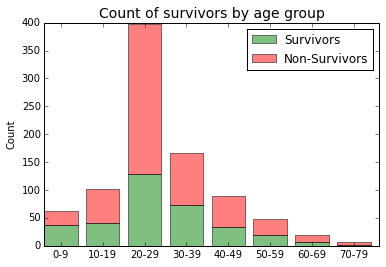

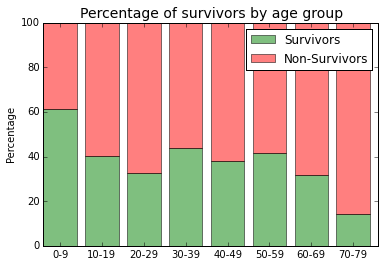

In [22]:
passenger_alive = titanic[titanic['Survived']==1]
passenger_dead = titanic[titanic['Survived']==0]

# Plotting count
passenger_alive_age = passenger_alive.groupby('age_group').count()['Survived']
passenger_dead_age = passenger_dead.groupby('age_group').count()['Survived']

plt.figure(1)
plt.bar(range(len(passenger_alive_age)),passenger_alive_age,label='Survivors', alpha=0.5, color='g')
plt.bar(range(len(passenger_dead_age)),passenger_dead_age,label='Non-Survivors', alpha=0.5, color='r',bottom=passenger_alive_age)
plt.xticks([0.4, 1.4, 2.4, 3.4, 4.4, 5.4, 6.4, 7.4],age_labels)
plt.ylabel("Count")
plt.title("Count of survivors by age group",fontsize=14)
plt.legend(loc='upper right')

# Plotting Percentage
passenger_alive_age_per = (passenger_alive_age / (passenger_alive_age+passenger_dead_age) * 100)
passenger_dead_age_per = (passenger_dead_age / (passenger_alive_age+passenger_dead_age) * 100)

plt.figure(2)
plt.bar(range(len(passenger_alive_age_per)),passenger_alive_age_per,label='Survivors', alpha=0.5, color='g')
plt.bar(range(len(passenger_dead_age_per)),passenger_dead_age_per,label='Non-Survivors', alpha=0.5, color='r',
        bottom = passenger_alive_age_per)
plt.xticks([0.4, 1.4, 2.4, 3.4, 4.4, 5.4, 6.4, 7.4],age_labels)
plt.ylabel("Percentage")
plt.title("Percentage of survivors by age group",fontsize=14)
plt.legend(loc='upper right')
plt.show()

This shows that most people in the dataset were from 20-29 age group.

**PClass**

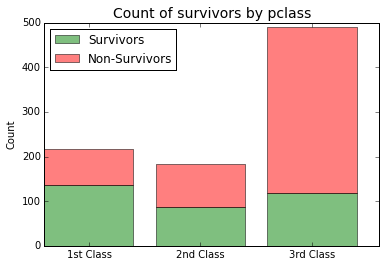

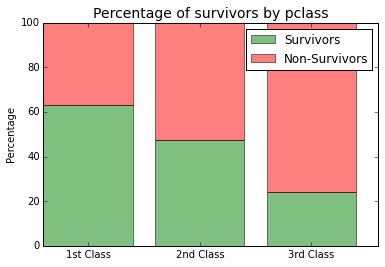

In [23]:
#Plotting Count
passenger_alive_pclass = passenger_alive.groupby('Pclass').count()['Survived']
passenger_dead_pclass = passenger_dead.groupby('Pclass').count()['Survived']

plt.bar(range(len(passenger_alive_pclass)),passenger_alive_pclass,label='Survivors', alpha=0.5, color='g')
plt.bar(range(len(passenger_dead_pclass)),passenger_dead_pclass,label='Non-Survivors', alpha=0.5, color='r',
        bottom=passenger_alive_pclass)
pclass_categ = ['1st Class', '2nd Class', '3rd Class']
plt.xticks([0.4, 1.4, 2.4],pclass_categ)
plt.ylabel("Count")
plt.title("Count of survivors by pclass",fontsize=14)
plt.legend(loc='upper left')

# Plotting Percentage
passenger_alive_pclass_per = (passenger_alive_pclass / (passenger_alive_pclass+passenger_dead_pclass) * 100)
passenger_dead_pclass_per = (passenger_dead_pclass / (passenger_alive_pclass+passenger_dead_pclass) * 100)

plt.figure(2)
plt.bar(range(len(passenger_alive_pclass_per)),passenger_alive_pclass_per,label='Survivors', alpha=0.5, color='g')
plt.bar(range(len(passenger_dead_pclass_per)),passenger_dead_pclass_per,label='Non-Survivors', alpha=0.5, color='r',
        bottom = passenger_alive_pclass_per)
plt.xticks([0.4, 1.4, 2.4],pclass_categ)
plt.ylabel("Percentage")
plt.title("Percentage of survivors by pclass",fontsize=14)
plt.legend(loc='upper right')
plt.show()

As above, most passengers travelling in 1st Class survived. Also, most of the pessangers are travelling in 3rd Class.

**Sex**

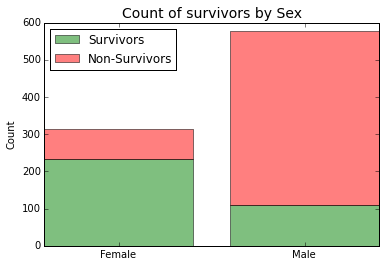

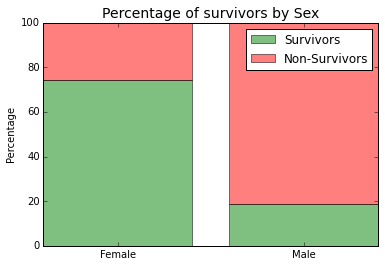

In [24]:
#Plotting Count
passenger_alive_sex = passenger_alive.groupby('Sex').count()['Survived']
passenger_dead_sex = passenger_dead.groupby('Sex').count()['Survived']

plt.bar(range(len(passenger_alive_sex)),passenger_alive_sex,label='Survivors', alpha=0.5, color='g')
plt.bar(range(len(passenger_dead_sex)),passenger_dead_sex,label='Non-Survivors', alpha=0.5, color='r',
        bottom=passenger_alive_sex)
sex_categ = ['Female', 'Male']
plt.xticks([0.4, 1.4],sex_categ)
plt.ylabel("Count")
plt.title("Count of survivors by Sex",fontsize=14)
plt.legend(loc='upper left')

# Plotting Percentage
passenger_alive_sex_per = (passenger_alive_sex / (passenger_alive_sex+passenger_dead_sex) * 100)
passenger_dead_sex_per = (passenger_dead_sex / (passenger_alive_sex+passenger_dead_sex) * 100)

plt.figure(2)
plt.bar(range(len(passenger_alive_sex_per)),passenger_alive_sex_per,label='Survivors', alpha=0.5, color='g')
plt.bar(range(len(passenger_dead_sex_per)),passenger_dead_sex_per,label='Non-Survivors', alpha=0.5, color='r',
        bottom = passenger_alive_sex_per)
plt.xticks([0.4, 1.4],sex_categ)
plt.ylabel("Percentage")
plt.title("Percentage of survivors by Sex",fontsize=14)
plt.legend(loc='upper right')
plt.show()

As above, mostly female passengers travelling survived.

**Embarked**

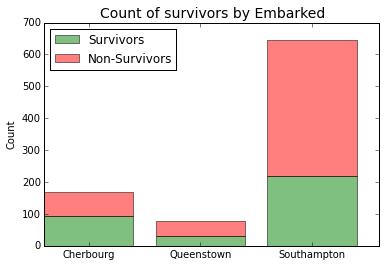

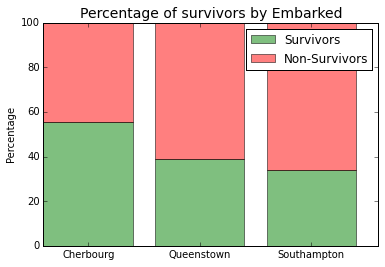

In [25]:
#Potting Count
passenger_alive_embarked = passenger_alive.groupby('Embarked').count()['Survived']
passenger_dead_embarked = passenger_dead.groupby('Embarked').count()['Survived']

plt.bar(range(len(passenger_alive_embarked)),passenger_alive_embarked,label='Survivors', alpha=0.5, color='g')
plt.bar(range(len(passenger_dead_embarked)),passenger_dead_embarked,label='Non-Survivors', alpha=0.5, color='r',
        bottom=passenger_alive_embarked)
emb_categ = ['Cherbourg', 'Queenstown', 'Southampton']
plt.xticks([0.4, 1.4, 2.4],emb_categ)
plt.ylabel("Count")
plt.title("Count of survivors by Embarked",fontsize=14)
plt.legend(loc='upper left')

# Plotting Percentage
passenger_alive_embarked_per = (passenger_alive_embarked / (passenger_alive_embarked+passenger_dead_embarked) * 100)
passenger_dead_embarked_per = (passenger_dead_embarked / (passenger_alive_embarked+passenger_dead_embarked) * 100)

plt.figure(2)
plt.bar(range(len(passenger_alive_embarked_per)),passenger_alive_embarked_per,label='Survivors', alpha=0.5, color='g')
plt.bar(range(len(passenger_dead_embarked_per)),passenger_dead_embarked_per,label='Non-Survivors', alpha=0.5, color='r',
        bottom = passenger_alive_embarked_per)
plt.xticks([0.4, 1.4, 2.4],emb_categ)
plt.ylabel("Percentage")
plt.title("Percentage of survivors by Embarked",fontsize=14)
plt.legend(loc='upper right')
plt.show()

Thus, Passengers with embarked as 'C' survived the most.

#Conclusion
    1. There were 549 out of 891 who are dead.
    2. There were 19 female and 19 male passengers who survived and who were younger than 10
    3. Average Age of Females who survived is 35 while average age of females who don't is 26.
    4. The following factors affect the survival of passengers in the following way:
        - most people in the dataset were from 20-29 age group.
        - most passengers travelling in 1st Class survived
        - most of the pessangers are travelling in 3rd Class.
        - mostly female passengers survived
        - passengers with embarked as 'C' survived the most